# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly.figure_factory as ff

from datetime import datetime

import warnings
warnings.filterwarnings("ignore")
print("All Libraries is Import")

All Libraries is Import


In [3]:
data=pd.read_csv('Data Sets/netflix_titles.csv')

In [4]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
data.shape

(8807, 12)

**Observation**
- In our datasets there is 8807 Rows and 12 Columns

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**Observation**
- there are 12 columns in dataset
- In our dataset only one columns is interger 

In [42]:
data.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

**Observation**
- In our dataset 6 columns can contain null value
- The Director columns contains higher number of Nans value as compare to other

In [20]:
round(data.isnull().mean()*100,0)

show_id          0.0
type             0.0
title            0.0
director        30.0
cast             9.0
country          9.0
date_added       0.0
release_year     0.0
rating           0.0
duration         0.0
listed_in        0.0
description      0.0
dtype: float64

**Observation**
- In Director columns 30% contain Nans value
- In Columns cast and country contains 9% Nans value

In [22]:
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

# Data Cleaning

In [35]:
data_clean=data.copy()

In [36]:
data_clean.director.isnull().sum()

2634

In [37]:
fill_list=data_clean['director'].dropna().tolist()
data_clean['director']=data_clean['director'].fillna(pd.Series(np.random.choice(fill_list,size=len(data.index))))

In [40]:
data_clean.director.isnull().sum()

0

**Observation**
- After cleaning there is no Nans value in **Director** columns we randoms fill the value

In [43]:
data_clean.cast.isnull().sum()

825

In [44]:
fill_list=data_clean['cast'].dropna().tolist()
data_clean['cast']=data_clean['cast'].fillna(pd.Series(np.random.choice(fill_list, size=len(data.index))))

In [46]:
data_clean.cast.isnull().sum()

0

**Observation**
- After cleaning there is no Nans value in **Cast** columns we randoms fill the value

In [47]:
data_clean.country.isnull().sum()

831

In [48]:
fill_list = data_clean['country'].dropna().tolist()
data_clean['country'] = data_clean['country'].fillna(pd.Series(np.random.choice(fill_list , size = len(data.index))))

In [50]:
data_clean.country.isnull().sum()

0

**Observation**
- After cleaning there is no Nans value in **Country** columns we randoms fill the value

In [51]:
data_clean.date_added.isnull().sum()

10

In [52]:
data_clean['date_added']=data_clean['date_added'].fillna(method='ffill')

In [53]:
data_clean.date_added.isnull().sum()

0

**Observation**
- After cleaning there is no Nans value in **Data_added** columns we randoms fill the value

In [55]:
data_clean.rating.isnull().sum()

4

In [58]:
data_clean['rating'].replace(to_replace=np.nan, value="Not_rating",inplace=True)

In [59]:
data_clean.rating.isnull().sum()

0

**Observation**
- After cleaning there is no Nans value in **rating** columns we randoms fill the value

In [62]:
data_clean['duration'].isnull().sum()


3

In [63]:
data_clean['duration']= data_clean['duration'].fillna(method="ffill")


In [64]:
data_clean['duration'].isnull().sum()


0

**Observation**
- After cleaning there is no Nans value in **duration** columns we randoms fill the value

In [65]:
data_clean.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

**Observation**
- So Now, our dataset is **100% Clean**

# Data Encoding

In [66]:
data_encode=data_clean.copy()

In [76]:
data_encode['date_added']=pd.to_datetime(data_encode['date_added'])
data_encode['year_added']=pd.DatetimeIndex(data_encode['date_added']).year
data_encode['month_added'] = data_encode['date_added'].dt.month

In [78]:
data_encode['year_added']=data_encode['year_added'].astype(int)
data_encode['month_added']=data_encode['month_added'].astype(int)

In [79]:
data_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  year_added    8807 non-null   int32         
 13  month_added   8807 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(10)
memory usage: 894.6+ KB


# EDA

In [81]:
eda=data_encode.copy()

In [82]:
eda['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

Text(0.5, 1.0, 'Type')

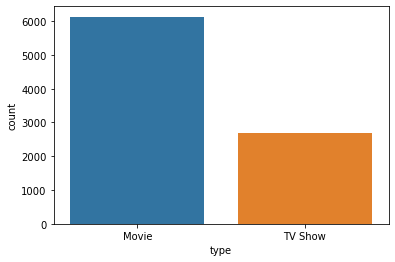

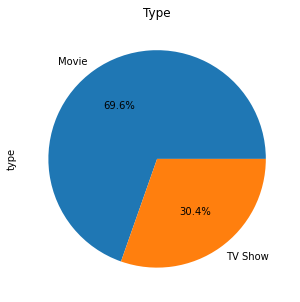

In [90]:
sns.countplot(data=eda,x=eda['type'])
fig=plt.figure(figsize=(5,5))
print('')
eda['type'].value_counts().plot(kind='pie',autopct='%.1f%%')
plt.title("Type")

Text(0.5, 1.0, 'Which years has more movie and TV shows Relased')

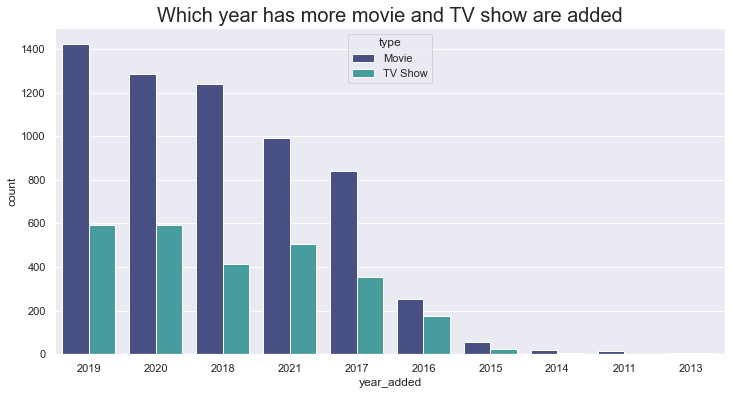

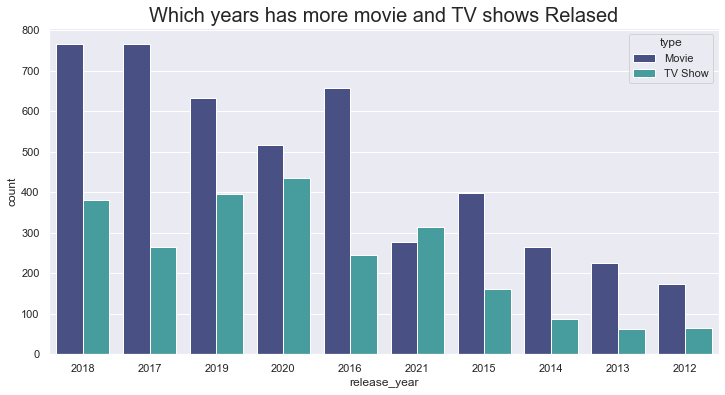

In [120]:
plt.figure(figsize=(12,6))
sns.countplot(data=eda,x=eda['year_added'],hue=eda['type'],palette='mako'
              ,order=eda['year_added'].value_counts().index[0:10])
plt.title("Which year has more movie and TV show are added",fontsize=20)

plt.figure(figsize=(12,6))
sns.countplot(data=eda,x=eda['release_year'],hue=eda['type'],
              order=eda['release_year'].value_counts().index[0:10],palette='mako')
plt.title("Which years has more movie and TV shows Relased",fontsize=20)

In [124]:
len(eda['director'].unique())

4528

<AxesSubplot:xlabel='director', ylabel='count'>

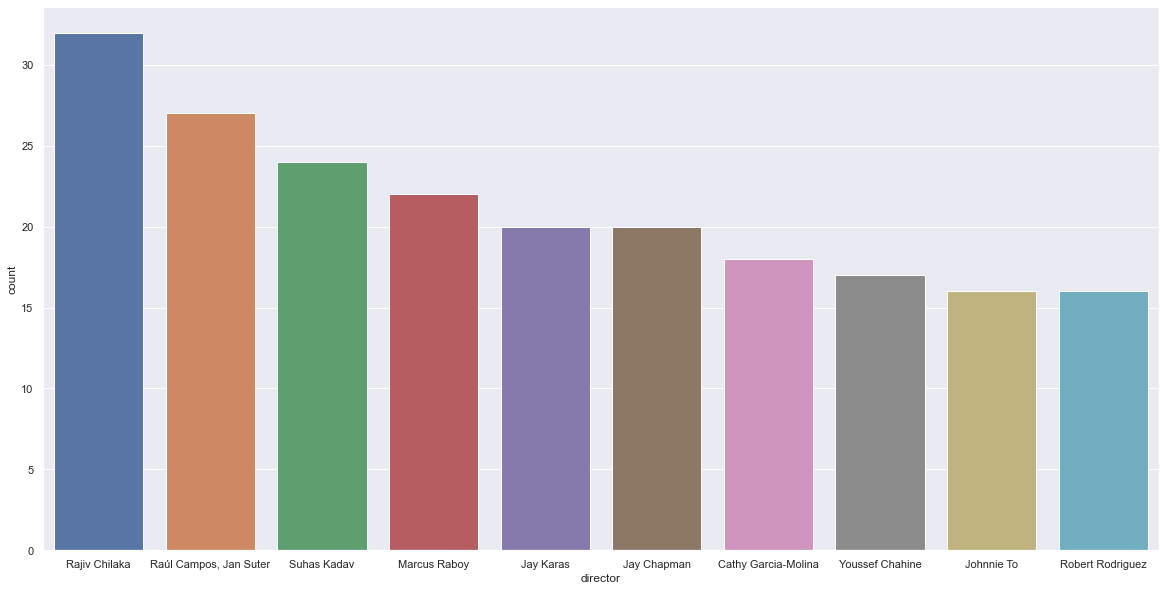

In [126]:
plt.figure(figsize=(20 ,10 ))
sns.countplot(data = eda , x =eda['director'] ,order=eda['director'].value_counts().index[0:10])

In [132]:
top_ten_director=eda['director'].value_counts().index[0:10]

<AxesSubplot:xlabel='country', ylabel='count'>

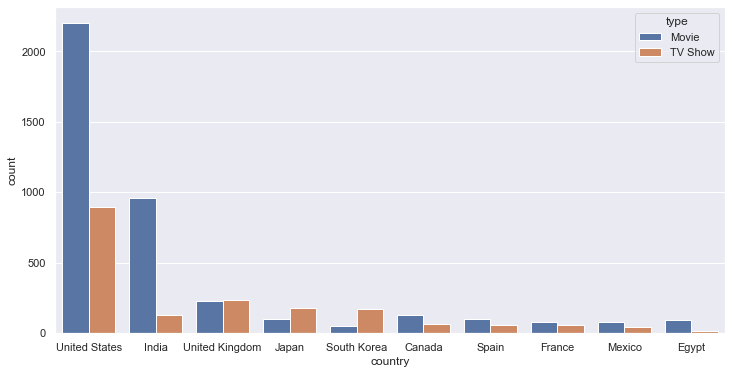

In [138]:
plt.figure(figsize=(12,6))
sns.countplot(data=eda,x=eda['country'],hue=eda['type'],order=eda['country'].value_counts().index[0:10])